In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
user_details = pd.read_excel(r"C:\Users\garim\Downloads\Data Analyst Intern Assignment - Excel.xlsx", sheet_name='UserDetails.csv')
cooking_sessions = pd.read_excel(r"C:\Users\garim\Downloads\Data Analyst Intern Assignment - Excel.xlsx", sheet_name='CookingSessions.csv')
order_details = pd.read_excel(r"C:\Users\garim\Downloads\Data Analyst Intern Assignment - Excel.xlsx", sheet_name='OrderDetails.csv')

In [4]:
# Step 1: Data Cleaning
# Check for missing values
print("Missing values:")
print("UserDetails:\n", user_details.isnull().sum())
print("CookingSessions:\n", cooking_sessions.isnull().sum())
print("OrderDetails:\n", order_details.isnull().sum())

Missing values:
UserDetails:
 User ID              0
User Name            0
Age                  0
Location             0
Registration Date    0
Phone                0
Email                0
Favorite Meal        0
Total Orders         0
dtype: int64
CookingSessions:
 Session ID         0
User ID            0
Dish Name          0
Meal Type          0
Session Start      0
Session End        0
Duration (mins)    0
Session Rating     0
dtype: int64
OrderDetails:
 Order ID        0
User ID         0
Order Date      0
Meal Type       0
Dish Name       0
Order Status    0
Amount (USD)    0
Time of Day     0
Rating          2
Session ID      0
dtype: int64


In [5]:
# Remove Duplicates
user_details = user_details.drop_duplicates()
cooking_sessions = cooking_sessions.drop_duplicates()
order_details = order_details.drop_duplicates()


In [6]:
# Ensure consistent column names
order_details.columns = order_details.columns.str.strip()
cooking_sessions.columns = cooking_sessions.columns.str.strip()
user_details.columns = user_details.columns.str.strip()

In [7]:
order_details['User ID'] = order_details['User ID'].astype(str).str.strip()
cooking_sessions['User ID'] = cooking_sessions['User ID'].astype(str).str.strip()
user_details['User ID'] = user_details['User ID'].astype(str).str.strip()

In [8]:
# Merge Data
# Step 1: Merge OrderDetails with CookingSessions
step1_merge = order_details.merge(cooking_sessions, on='Session ID', how='inner')
print("Step 1 Merge Successful")

Step 1 Merge Successful


In [9]:
# Step 2: Merge with UserDetails
step1_merge = step1_merge.rename(columns={'User ID_x': 'User ID'})
step2_merge = step1_merge.merge(user_details, on='User ID', how='left')
print("Step 2 Merge Successful")

Step 2 Merge Successful


In [10]:
# Step 3: Analysis
# Popular dishes
popular_dishes = step2_merge['Dish Name_x'].value_counts()
print("\nPopular Dishes:\n", popular_dishes)


Popular Dishes:
 Spaghetti          4
Grilled Chicken    4
Caesar Salad       3
Pancakes           2
Veggie Burger      2
Oatmeal            1
Name: Dish Name_x, dtype: int64


In [11]:
# Relationship between cooking sessions and orders
order_session_analysis = step2_merge.groupby(['Dish Name_x', 'Meal Type_x']).size()
print("\nOrder vs Cooking Sessions Analysis:\n", order_session_analysis)


Order vs Cooking Sessions Analysis:
 Dish Name_x      Meal Type_x
Caesar Salad     Lunch          3
Grilled Chicken  Dinner         4
Oatmeal          Breakfast      1
Pancakes         Breakfast      2
Spaghetti        Dinner         4
Veggie Burger    Lunch          2
dtype: int64


In [12]:
# Demographic analysis
age_analysis = step2_merge.groupby('Age')['Total Orders'].sum()
print("\nAge Analysis:\n", age_analysis)



Age Analysis:
 Age
25.0     7.0
27.0    20.0
28.0    36.0
30.0    18.0
31.0     5.0
35.0    24.0
38.0    14.0
42.0    45.0
Name: Total Orders, dtype: float64


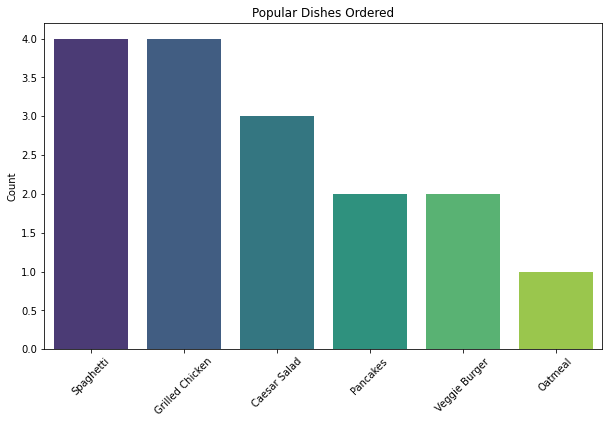

In [13]:
# Step 4: Visualization
# Plot popular dishes
plt.figure(figsize=(10, 6))
sns.barplot(x=popular_dishes.index, y=popular_dishes.values, palette='viridis')
plt.title('Popular Dishes Ordered')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

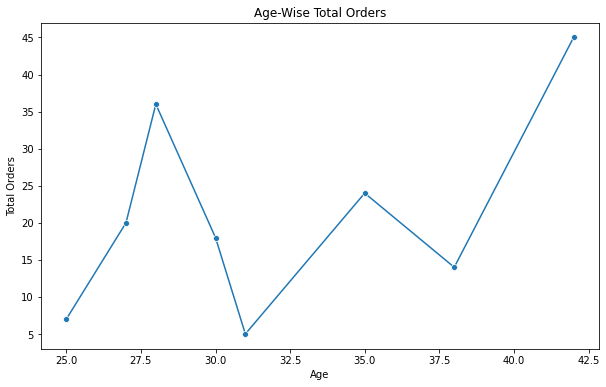

In [14]:
# Plot orders by age
plt.figure(figsize=(10, 6))
sns.lineplot(x=age_analysis.index, y=age_analysis.values, marker='o')
plt.title('Age-Wise Total Orders')
plt.xlabel('Age')
plt.ylabel('Total Orders')
plt.show()

In [15]:
# Save merged data
step2_merge.to_csv('Merged_Data.csv', index=False)
print("Analysis complete. Visualizations generated, and merged data saved as 'Merged_Data.csv'.")

Analysis complete. Visualizations generated, and merged data saved as 'Merged_Data.csv'.
